## 第3章　分類問題
(A Tour of Machine Learning Classifiers Using Scikit-Learn)

### 3.2

In [1]:
from sklearn import datasets
import numpy as np

# load a data of Iris
iris = datasets.load_iris()

In [2]:
# select the third and fourth feature
X = iris.data[:, [2, 3]]
# get the label of the data
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split
# split the data into train and test(30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1234, stratify=y)

In [4]:
# check stratified sampling
print('Label counts in y:', np.bincount(y))
print('Label counts in y:', np.bincount(y_train))
print('Label counts in y:', np.bincount(y_test))

Label counts in y: [50 50 50]
Label counts in y: [35 35 35]
Label counts in y: [15 15 15]


In [5]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# get mean and standard deviation of the train data
sc.fit(X_train)
# standalization the data using them
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
# training (Perceptron)
from sklearn.linear_model import Perceptron
# make a instance of perceptron (Epoch: 40, eta:0.1)
ppn = Perceptron(n_iter_no_change=40, eta0=0.1, random_state=1234)
# fit the model for train data
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=40, n_jobs=None,
           penalty=None, random_state=1234, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [7]:
# predict labels using the moel
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 2


In [8]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.956


In [9]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.956


### Visualization of the model

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'grey', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot decision regions
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # make grid points
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    
    # predict labels at each point
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # plot contour lines of grid points
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot a sample in each class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black'
                   )

    # enphasize samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='',
                    edgecolors='black',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=100,
                    label='test set')

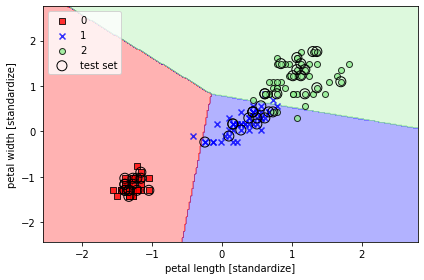

In [11]:
# combine train and test data
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# plot decision regions
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn,
                     test_idx=range(105, 150)) # range of test data

# set axis labels
plt.xlabel('petal length [standardize]')
plt.ylabel('petal width [standardize]')

# set an legend
plt.legend(loc='upper left')

# plot an graph
plt.tight_layout()
plt.show()

### 3.3

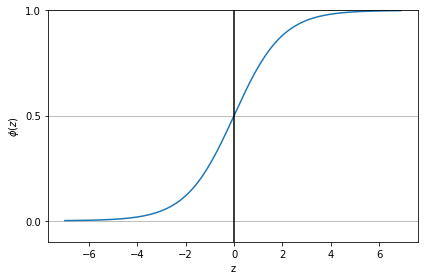

In [12]:
import matplotlib.pyplot as plt
import numpy as np
# define sigmoid function
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

# make data at 0.1 intervals
z = np.arange(-7, 7, 0.1)

phi_z = sigmoid(z)

# plot z and output of sigmoid function
plt.plot(z, phi_z)

# set graph
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 0.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])

# get object of Axes class
ax = plt.gca()
ax.yaxis.grid(True)

# plot graph
plt.tight_layout()
plt.show()

In [13]:
# function, which outputs cost of y=1
def cost_1(z):
    return -np.log(sigmoid(z))
# function, which outputs cost of y=0
def cost_0(z):
    return -np.log(1-sigmoid(z))

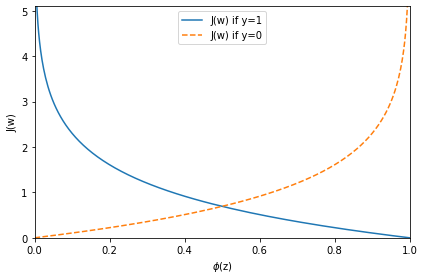

In [14]:
# make data at 0.1 intervals
z = np.arange(-10., 10., 0.1)

# outouts of the activation function
phi_z = sigmoid(z)

# cost (y=1)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

# cost (y=0)
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--',label='J(w) if y=0')

# set range of axis
plt.xlim([0, 1])
plt.ylim(0.0, 5.1)

# set labels
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')

# set legend
plt.legend(loc='upper center')

plt.tight_layout()
plt.show()

In [15]:
class LogRegGD(object):
    
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ fit the training data """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=(1+X.shape[1]))
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # calculate output with the activation function
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            # compute the cost
            cost = -y.dot(np.log(output)) - ((1-y).dot(np.log(1-output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """ compute the total input """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        """ compute the output of logistic sigmoid activation function """
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        """ return the label after one step """
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
        

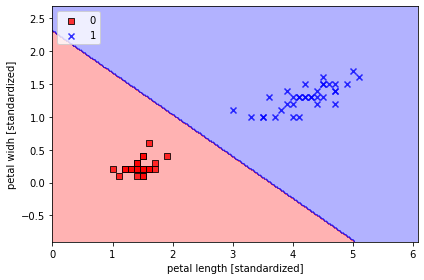

In [16]:
# data of classes (0 or 1)
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

# make an instance of logistic regression
lrgd = LogRegGD(eta=0.05, n_iter=1000, random_state=1)
# fit the model for the training data
lrgd.fit(X_train_01_subset, y_train_01_subset)
# plot decision regions
plot_decision_regions(X=X_train_01_subset,y=y_train_01_subset, classifier=lrgd)

# set labels
plt.xlabel('petal length [standardized]')
plt.ylabel('petal widh [standardized]')
# set legend
plt.legend(loc='upper left')
# plot graph
plt.tight_layout()
plt.show()

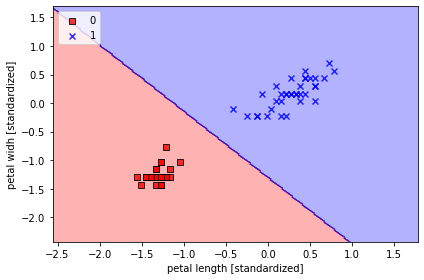

In [17]:
# data of classes (0 or 1)
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

# make an instance of logistic regression
lrgd = LogRegGD(eta=0.05, n_iter=1000, random_state=1)
# fit the model for the training data
lrgd.fit(X_train_01_subset, y_train_01_subset)
# plot decision regions
plot_decision_regions(X=X_train_01_subset,y=y_train_01_subset, classifier=lrgd)

# set labels
plt.xlabel('petal length [standardized]')
plt.ylabel('petal widh [standardized]')
# set legend
plt.legend(loc='upper left')
# plot graph
plt.tight_layout()
plt.show()

3.3.4

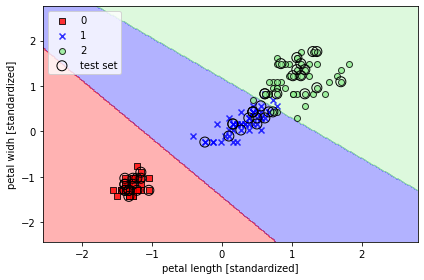

In [22]:
from sklearn.linear_model import LogisticRegression
# make of logistic regression
lr = LogisticRegression(C=100.0, random_state=1234)
# fit the training data for this model
lr.fit(X_train_std, y_train)
# plot decision regions
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))

# set labels
plt.xlabel('petal length [standardized]')
plt.ylabel('petal widh [standardized]')
# set legend
plt.legend(loc='upper left')
# plot graph
plt.tight_layout()
plt.show()

In [23]:
lr.predict_proba(X_test_std[:3, :])

array([[1.11580380e-12, 1.47917844e-04, 9.99852082e-01],
       [3.56870550e-12, 3.82169344e-04, 9.99617831e-01],
       [9.45409704e-15, 9.12574356e-06, 9.99990874e-01]])

In [24]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [27]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 2, 2])

In [28]:
lr.predict(X_test_std[:3, :])

array([2, 2, 2])

In [29]:
lr.predict(X_test_std[0, :])

ValueError: Expected 2D array, got 1D array instead:
array=[0.84421076 1.49321026].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [37]:
X_test_std[0, :].shape

(2,)

In [36]:
X_test_std[0, :]

array([0.84421076, 1.49321026])

In [41]:
X_test_std[0, :].reshape(1, -1).shape

(1, 2)

In [42]:
X_test_std[0, :].reshape(1, 2)

array([[0.84421076, 1.49321026]])

In [43]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

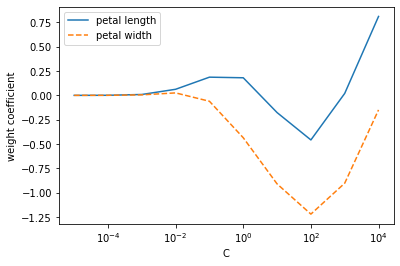

In [46]:
#make empty lists of weights and parameters
weights, params = [], []

for c in range(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1234)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

# transform weights into NumPy array
weights = np.array(weights)
# graph of inverse regularization params vs. weights
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.xlabel('C')
plt.ylabel('weight coefficient')
plt.legend(loc='upper left')
# log scale
plt.xscale('log')
plt.show()